# Выбор локации для скважины

Нужно решить, где бурить новую скважину. В каждом регионе 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. 

## Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
geo_data_0.info()
geo_data_0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_data_1.info()
geo_data_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
geo_data_2.info()
geo_data_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
# проверю на уникальность id, если дубли, то какого рода
def no_uniq(data,name):
    if data['id'].nunique() != len(data):
        gr = data['id'].value_counts()
        print('в '+name+' найдены неуникальные записи')
        display(data[data.id.isin(gr[gr>1].index)].sort_values(by = 'id'))
        print()

no_uniq(geo_data_0,'geo_data_0')

в geo_data_0 найдены неуникальные записи


,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


In [7]:
no_uniq(geo_data_1,'geo_data_1')

в geo_data_1 найдены неуникальные записи


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


In [8]:
no_uniq(geo_data_2,'geo_data_2')

в geo_data_2 найдены неуникальные записи


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


По дублям видно, что на один и тот же id разные данные. Непонятно это ошибка в id, какое-то довнесение информации, уточненое значение, а старое не удалили. Такие записи проще убрать.

In [9]:
def delete_no_uniq(data):
    if data['id'].nunique() != len(data):
        gr = data['id'].value_counts()
        return data.drop(np.where(data.id.isin(gr[gr>1].index))[0], axis = 0)
geo_data_0 = delete_no_uniq(geo_data_0)
geo_data_1 = delete_no_uniq(geo_data_1)
geo_data_2 = delete_no_uniq(geo_data_2)

Линейная регрессия очень чувствительна к выбросам. нужно их удалить, если есть.

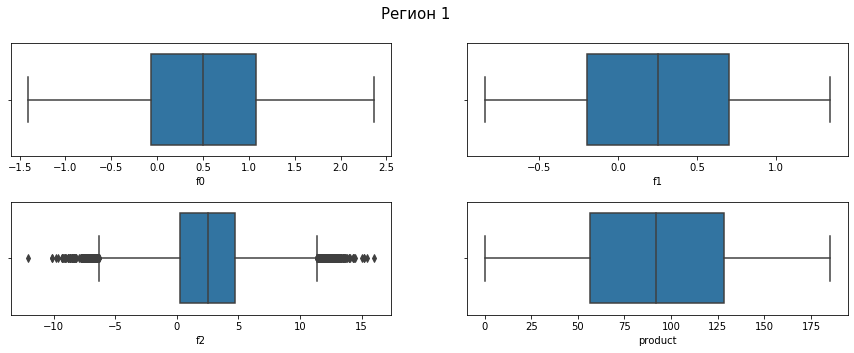

In [10]:
data = ['f0','f1','f2','product']
numeric = ['f0', 'f1', 'f2']
def box_plot(axes, df):
    n = 2
    for i in range(0, len(data)):
        j = i//n
        k = i%n
        sns.boxplot(df[data[i]], ax = axes[j][k])
        

fig, axes = plt.subplots(2, 2, figsize=(15, 5))
fig.suptitle('Регион 1', fontsize = 15)
box_plot(axes, geo_data_0)
plt.subplots_adjust(wspace= 0.2, hspace= 0.4)
plt.show()

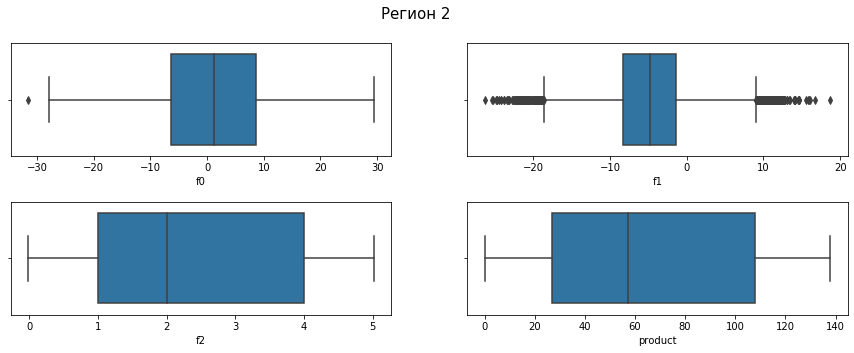

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
fig.suptitle('Регион 2', fontsize = 15)
box_plot(axes, geo_data_1)
plt.subplots_adjust(wspace= 0.2, hspace= 0.4)
plt.show()

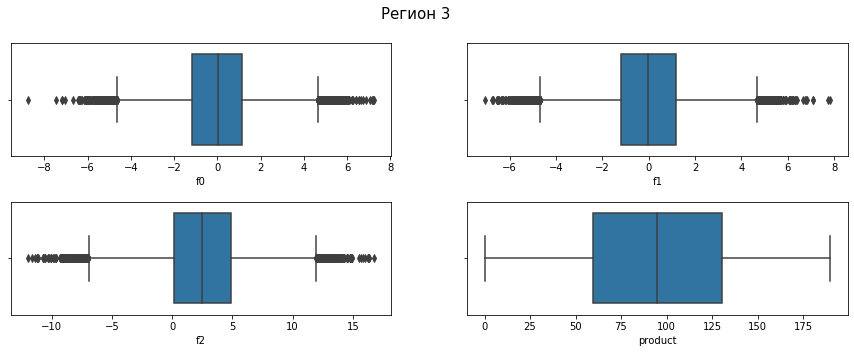

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
fig.suptitle('Регион 3', fontsize = 15)
box_plot(axes, geo_data_2)
plt.subplots_adjust(wspace= 0.2, hspace= 0.4)
plt.show()

Выбросы есть. Нужно удалять запись, если даже по одной колонке есть выброс.

In [13]:
def delete_v(df, name):
    copy = df.copy()
    describe = copy.describe()
    for i in data:
        q =  describe[i]
        q1 = q['25%']
        q3 = q['75%']
        mq = q3 - q1
        filter_up =  (copy[i] > (q3 + mq*1.5))
        filter_down = (0 < copy[i]) & (copy[i] < (q1 - mq*1.5))
        #обнуляю
        copy.loc[filter_up, i] = float('Nan')
        copy.loc[filter_down, i] = float('Nan')
    # Удаляю строки, где хотя бы одно из этих значений 0
    print(name + ' будет удалено '+str(len(copy[copy.isnull().any(1)]))+ ' строк')
    return copy.dropna(axis = 0)
geo_data_0_no_v = delete_v(geo_data_0, 'Данные региона 1')
geo_data_1_no_v = delete_v(geo_data_1, 'Данные региона 2')
geo_data_2_no_v = delete_v(geo_data_2, 'Данные региона 3')


Данные региона 1 будет удалено 248 строк
Данные региона 2 будет удалено 339 строк
Данные региона 3 будет удалено 1015 строк


Теперь нужно проверить какое распределение у каждого показателя. Гистограмма - не слишком информативно, лучше qq график. 

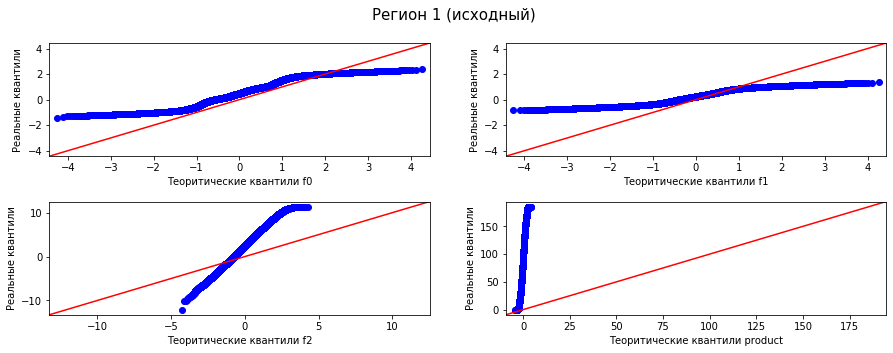

In [14]:
def qq_plot(axes, df):
    n = 2
    for i in range(0, len(data)):
        j = i//n
        k = i%n
        sm.qqplot(df[data[i]], ax = axes[j][k] , line ='45')
        axes[j][k].set_xlabel('Теоритические квантили '+str(data[i]))
        axes[j][k].set_ylabel('Реальные квантили')

def log(df):
    cop = df.copy()
    describe = cop.describe()
    for i in numeric:
        #так как есть отрицательные значения, то смещаю так, 
        #что бы логарифм минимального значение равнялся 0
        cop[i] = np.log(cop[i] - describe[i]['min'] + 1)
    return cop
      
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
fig.suptitle('Регион 1 (исходный)', fontsize = 15)
qq_plot(axes, geo_data_0_no_v)
plt.subplots_adjust(wspace= 0.2, hspace= 0.4)
plt.show()


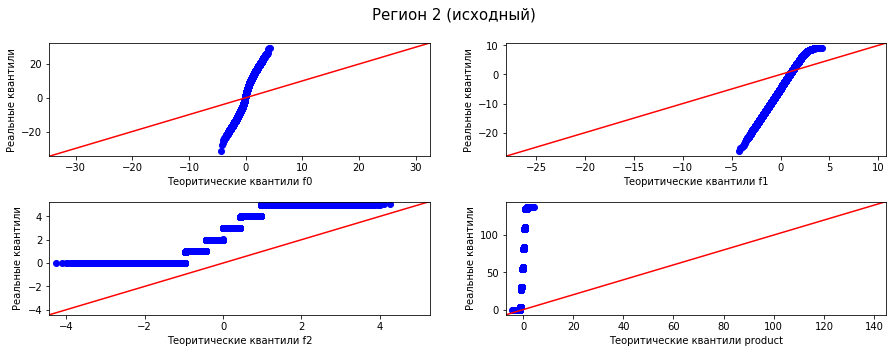

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
fig.suptitle('Регион 2 (исходный)', fontsize = 15)
qq_plot(axes, geo_data_1_no_v)
plt.subplots_adjust(wspace= 0.2, hspace= 0.4)
plt.show()

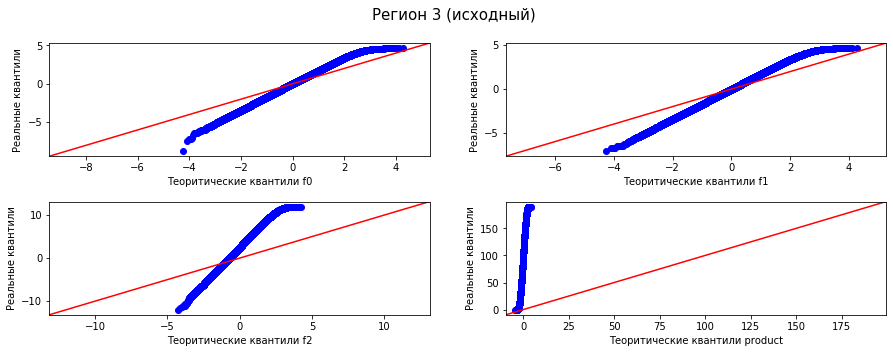

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
fig.suptitle('Регион 3 (исходный)', fontsize = 15)
qq_plot(axes, geo_data_2_no_v)
plt.subplots_adjust(wspace= 0.2, hspace= 0.4)
plt.show()

Явно видно, что распределение не нормальное. Возможно, качество модели повысит логорифмирование переменных.

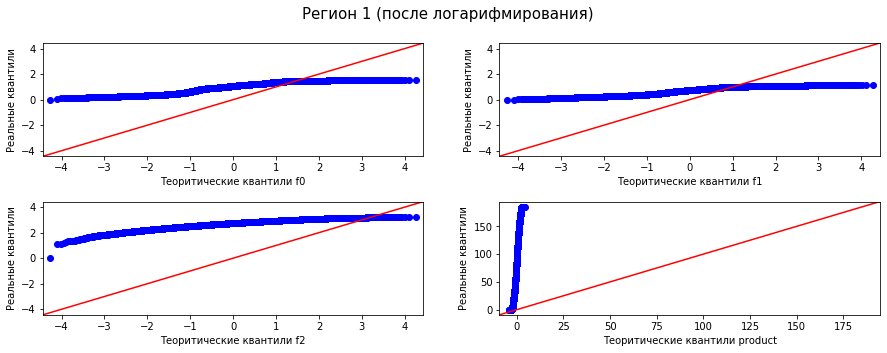

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
fig.suptitle('Регион 1 (после логарифмирования)', fontsize = 15)
geo_data_0_no_v_log = log(geo_data_0_no_v)
qq_plot(axes, geo_data_0_no_v_log)
plt.subplots_adjust(wspace= 0.2, hspace= 0.4)
plt.show()

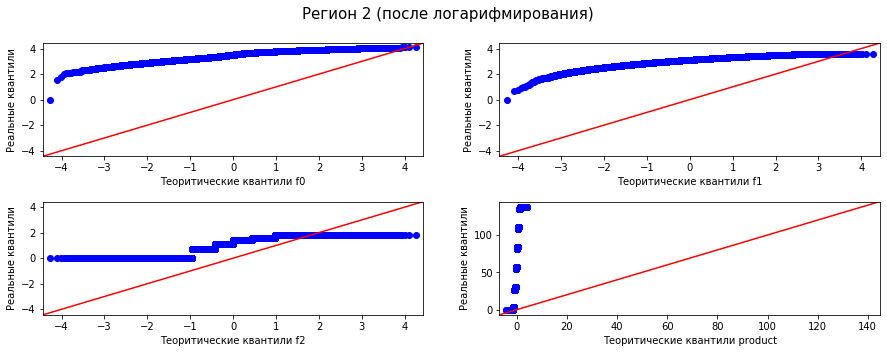

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
fig.suptitle('Регион 2 (после логарифмирования)', fontsize = 15)
geo_data_1_no_v_log = log(geo_data_1_no_v)
qq_plot(axes, geo_data_1_no_v_log)
plt.subplots_adjust(wspace= 0.2, hspace= 0.4)
plt.show()

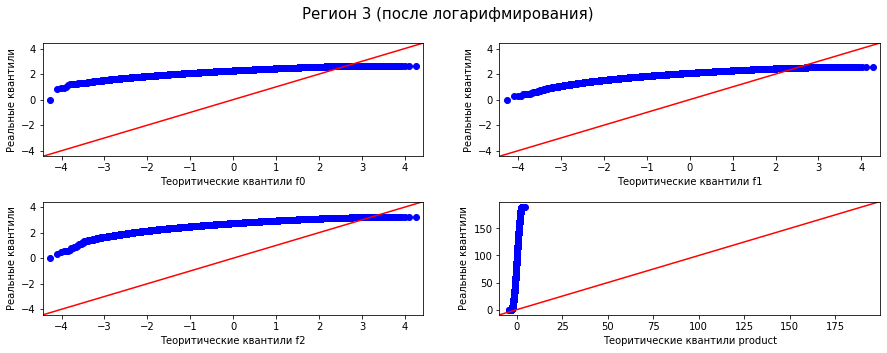

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
fig.suptitle('Регион 3 (после логарифмирования)', fontsize = 15)
geo_data_2_no_v_log = log(geo_data_2_no_v)
qq_plot(axes, geo_data_2_no_v_log)
plt.subplots_adjust(wspace= 0.2, hspace= 0.4)
plt.show()

### Вывод

В данных найдены дуюли непонятной природы. Из-за этой неизвестности пришлось удалить дублирующиеся значения. Их было немного, поэтому проблем не должно. Из данных были убраны выбросы. Распределение явно не нормальное и неравномерное, поэтому дополнительно прологорифмировал значения.

## Обучение и проверка модели

In [20]:
result = pd.DataFrame({'rmse_mean':[], 'rmse_mean':[],'region':[],'name':[],'model':[], 'x_test':[], 'y_test':[], 'x_train':[], 'y_train':[], 'predict':[]})
pd.options.mode.chained_assignment = None

def add_model(df, region, name):
    global result
    x = df.drop(['product','id'], axis=1)
    y = df['product']
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.25, random_state=10, shuffle = True)
    
    # Масштабирую значения    
    scaler = StandardScaler()
    scaler.fit(x_train) 
    x_train = scaler.transform(x_train)
    x_test= scaler.transform(x_test) 
    
    # mse для среднего, что бы понять адекватность модели 
    predicted = pd.Series(y_train.mean(), index=y_test.index)
    rmse_mean = mean_squared_error(y_test, predicted)**0.5
    
    model = LinearRegression().fit(x_train, y_train)
    predicted = model.predict(x_test)
    rmse = mean_squared_error(y_test, predicted)**0.5    
    
    s = {'predict':pd.Series(predicted, index=y_test.index),
         'y_train':y_train,
         'x_train':x_train,
         'y_test':pd.Series(y_test),
         'x_test':x_test,
         'rmse_mean':rmse_mean,
         'rmse':rmse,
         'region':region,
         'name':name,
         'model':model}
    result = result.append(s, ignore_index=True)
    
add_model(geo_data_0_no_v_log, 'регион 1', 'без выбросов, логарифм')
add_model(geo_data_1_no_v_log, 'регион 2', 'без выбросов, логарифм')
add_model(geo_data_2_no_v_log, 'регион 3', 'без выбросов, логарифм')
add_model(geo_data_0_no_v, 'регион 1', 'без выбросов')
add_model(geo_data_1_no_v, 'регион 2', 'без выбросов')
add_model(geo_data_2_no_v, 'регион 3', 'без выбросов')
add_model(geo_data_0, 'регион 1', 'исходный')
add_model(geo_data_1, 'регион 2', 'исходный')
add_model(geo_data_2, 'регион 3', 'исходный')

In [21]:
result['predict_mean'] = result['predict'].apply(lambda x: x.mean())
result[['region','name', 'rmse_mean', 'rmse', 'predict_mean']].sort_values(by = ['region','rmse'])

,region,name,rmse_mean,rmse,predict_mean
3,регион 1,без выбросов,44.212293,37.700343,92.273077
6,регион 1,исходный,44.343559,37.713125,92.376144
0,регион 1,"без выбросов, логарифм",44.212293,37.952625,92.255487
7,регион 2,исходный,45.982905,0.890088,68.871711
4,регион 2,без выбросов,45.932141,0.890691,68.911823
1,регион 2,"без выбросов, логарифм",45.932141,11.564366,68.898158
5,регион 3,без выбросов,44.684099,40.042631,94.617254
8,регион 3,исходный,44.796441,40.120143,94.768363
2,регион 3,"без выбросов, логарифм",44.684099,40.235202,94.628253


In [22]:
result = result.iloc[result.groupby(['region']).apply(lambda x: x['rmse'].idxmin())]
result[['region','name', 'rmse_mean', 'rmse', 'predict_mean']]

,region,name,rmse_mean,rmse,predict_mean
3,регион 1,без выбросов,44.212293,37.700343,92.273077
7,регион 2,исходный,45.982905,0.890088,68.871711
5,регион 3,без выбросов,44.684099,40.042631,94.617254


### Вывод

Для каждого района было обучено 3 модели: на исходном датасете, на датасете без выбросов, и датасет без выбросов с прологорифмированными значениями. Модель на любом датасете показала адеватность. Модель уменьшает ошибку, по сравнению с константной моделью. Но что удивитиельно, в регионе 2 модель на исходных данных с выбросами получилась самой качественной, а модели на прологорифмированных данных показали худшие результаты. По итогу, отобрали в каждом регионе самую лушчую модель.

## Подготовка к расчёту прибыли

In [23]:
COUNT = 200
BUD = 10**10
SUM = 45*(10**4)
V = 2.5
print('количество сырья для покрытия расхода')
round(BUD/COUNT/SUM,2)

количество сырья для покрытия расхода


111.11

Среднего предсказанного объёма запасов в любом регионе, не хватет для покрытия расходов, а значит просто случайно выбрать скважины - не имеет смысла. Поэтому нужно выбирать скважины с самым большим объёмом.

## Расчёт прибыли и рисков 

In [24]:
# функция рассчета прибыли
def get_pr(target, predict,count):
    return (target[predict.sort_values(ascending = False)[:count].index].sum()*SUM-BUD)/(10**9)
        

result['prib'] = result.apply(lambda x:  get_pr(x.y_test, x.predict, COUNT), axis =1 )
result[['region','prib']].sort_values('prib', ascending = False)

,region,prib
3,регион 1,3.556046
5,регион 3,2.722886
7,регион 2,2.415087


In [ ]:

state = np.random.RandomState(10)
def boostrap(target, predict, count):
    values = []
    for i in range(1000):
        predict_subsample = predict.sample(n=500, replace=True, random_state=state)
        target_subsample = target[predict.index]        
        values.append(get_pr(target_subsample, predict_subsample, count))
    values = pd.Series(values) 
    # вычисляю 95% интервал, и вероятность безубыточности
    return [values.quantile(V/100), values.quantile(0.95+V/100),  stats.percentileofscore(values,0)]
    
result['interval'] = result.apply(lambda x:  boostrap(x.y_test, x.predict, COUNT), axis =1 )


In [ ]:
result['lower'] = result['interval'].apply(lambda x:  x[0])
result['upper'] = result['interval'].apply(lambda x:  x[1])
result['risk'] = result['interval'].apply(lambda x:  x[2])
result[['region','prib', 'lower', 'upper', 'risk']].sort_values('lower', ascending = False)

### Вывод

Для разработки нужно выбирать Регион 2. Так как это единственный регион, где риск получить убытки удолетворяет условию задачи.